#K MEANS CLUSTERING PROJECT

It is very important to note, I actually have the labels for this data set, but I will NOT use them for the KMeans clustering algorithm, since that is an unsupervised learning algorithm.
When using the Kmeans algorithm under normal circumstances, it is because i don't have labels. In this case i will use the labels to try to get an idea of how well the algorithm performed, but i won't usually do this for Kmeans, so the classification report and confusion matrix at the end of this project, don't truly make sense in a real world setting!

#THE DATA

I will attempt to use KMeans Clustering to cluster Universities into two groups, Private and Public.

I will use a data frame with 777 observations on the following 18 variables.
1) Private A factor with levels No and Yes indicating private or public university
2) Apps Number of applications received
3) Accept Number of applications accepted
4) Enroll Number of new students enrolled
5) Top10perc Pct. new students from top 10% of H.S. class
6) Top25perc Pct. new students from top 25% of H.S. class
7) F.Undergrad Number of fulltime undergraduates
8) P.Undergrad Number of parttime undergraduates
9) Outstate Out-of-state tuition
10) Room.Board Room and board costs
11) Books Estimated book costs
12) Personal Estimated personal spending
13) PhD Pct. of faculty with Ph.D.’s
14) Terminal Pct. of faculty with terminal degree
15) S.F.Ratio Student/faculty ratio
16) perc.alumni Pct. alumni who donate
17) Expend Instructional expenditure per student
19) Grad.Rate Graduation rate

#IMPORTS

In [132]:
#Import Numpy And Pandas
import numpy as np
import pandas as pd

In [134]:
#Import Matplotlib And Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#GET THE DATA

In [137]:
#Read College_data and make a dataframe and set 1st column to index
df = pd.read_csv('college_data',index_col=0)

In [139]:
#Check head of df
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [141]:
#Info on df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [143]:
#Describe on df
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


#EXPLORATORY DATA ANALYSIS

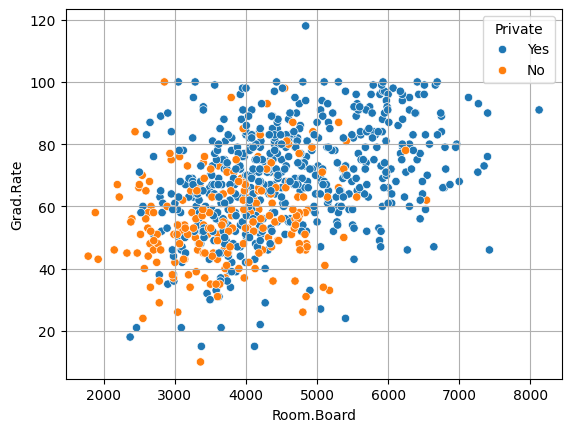

In [146]:
#Scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column
sns.scatterplot(data=df,x='Room.Board',y='Grad.Rate',hue='Private')
plt.grid(True)

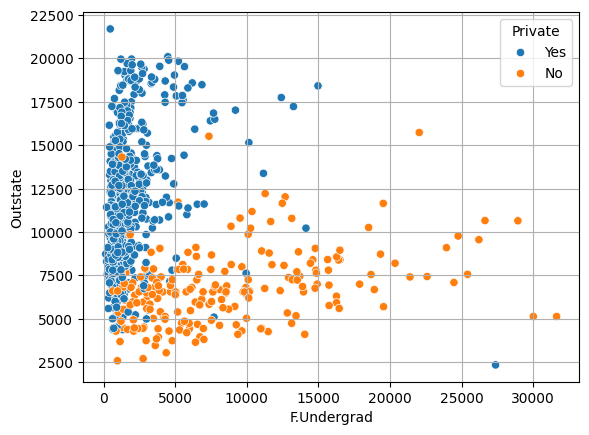

In [148]:
#Scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.
sns.scatterplot(data=df,x='F.Undergrad',y='Outstate',hue='Private')
plt.grid(True)

<Axes: xlabel='Outstate', ylabel='Count'>

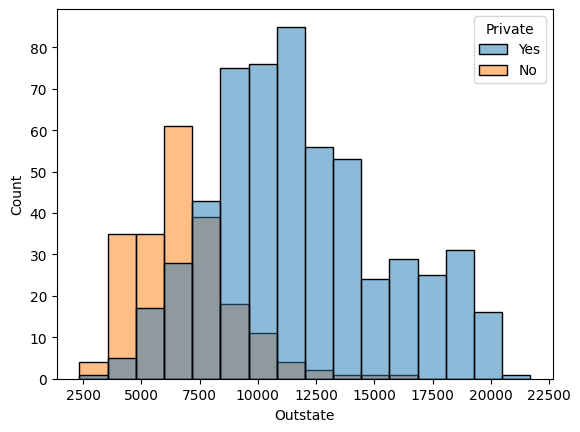

In [150]:
#Histplot of Outstate with hue based off Private
sns.histplot(data=df,x=df['Outstate'],hue='Private')

<Axes: xlabel='Grad.Rate', ylabel='Count'>

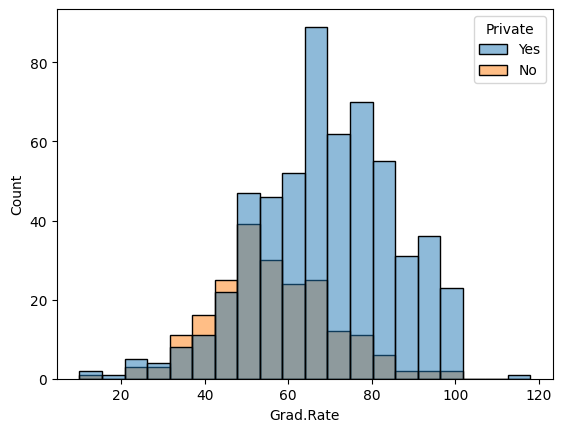

In [152]:
#Histplot of Grad.Rate with hue based off Private
sns.histplot(data=df,x=df['Grad.Rate'],hue='Private')

In [154]:
#Notice how there seems to be a private school with a graduation rate of higher than 100%. What is the name of that school?
df[df['Grad.Rate']>100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [156]:
#Ans -> Cazenovia College

In [158]:
#Correct It In histogram and make it 100
df.loc['Cazenovia College','Grad.Rate']=100

#K MEANS CLUSTER CREATION

In [161]:
# Import KMeans clustering algorithm from scikit-learn
from sklearn.cluster import KMeans

In [163]:
#Create an instance of a K Means model with 2 clusters
model = KMeans()

In [165]:
#Fit the model to all the data except for the Private label
model.fit(df.drop('Private',axis=1))

KMeans()

In [167]:
#The coordinates of the cluster centers after fitting the KMeans model
model.cluster_centers_

array([[1.27534591e+03, 9.23194969e+02, 4.18874214e+02, 1.73459119e+01,
        4.37672956e+01, 1.78987421e+03, 5.76943396e+02, 6.50668553e+03,
        3.51515723e+03, 5.37748428e+02, 1.41116352e+03, 6.24088050e+01,
        6.88805031e+01, 1.61584906e+01, 1.59559748e+01, 6.16010692e+03,
        5.51949686e+01],
       [2.05202256e+03, 1.51531579e+03, 4.77000000e+02, 3.28120301e+01,
        6.26917293e+01, 1.91698496e+03, 3.53180451e+02, 1.42018045e+04,
        5.02915789e+03, 5.57842105e+02, 1.08357143e+03, 7.93157895e+01,
        8.69548872e+01, 1.24939850e+01, 2.90902256e+01, 1.13927068e+04,
        7.37969925e+01],
       [1.00949592e+04, 6.87381633e+03, 2.68475510e+03, 3.17346939e+01,
        6.33673469e+01, 1.39987755e+04, 3.07128571e+03, 8.73114286e+03,
        4.33261224e+03, 5.98163265e+02, 1.85655102e+03, 8.44081633e+01,
        8.97551020e+01, 1.56918367e+01, 1.61632653e+01, 1.00913061e+04,
        6.19183673e+01],
       [3.65624590e+03, 2.08947541e+03, 6.31868852e+02, 5.213

#EVALUATION

There is no perfect way to evaluate clustering if you don't have the labels, however i do have the labels, so i take advantage of this to evaluate our clusters.

In [171]:
#New column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.
def convat(n):
    if(n=='Yes'):
        return 1
    else:
        return 0
df['Cluster']=df['Private'].apply(convat)

In [173]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [177]:
# Confusion matrix to see how well the Kmeans clustering worked without being given any labels
from sklearn.metrics import confusion_matrix
print(confusion_matrix(df['Cluster'],model.labels_))

[[ 64   1  44   1   5   0  15  82]
 [ 95 132   5  60 245  16   2  10]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]


#END OF NOTEBOOK

#CREATED BY SHAURYA MITTAL